# Q1

The data was first extracted from teh .dat file and seperated type. the "t" variable holds the discrete time stamps while the "y" variable holds the measured output at said timestamps

In [27]:
import numpy as np
param_max = 5 # Largest number of parameters

data = np.loadtxt('dataHw1.dat')
t = data[:,0].copy()
y = data[:,1].copy()

A look-up table containing the regressors was generated. The width of this table (# of columns) is determined by the value of the "param_max" variable declaired in the previous cell. The code code cell used for estimating phi will make use of this table by slicing the required section (e.g. only the first 2 columns will be used when estimating 2 parameters).

In [26]:
phi = np.stack([(t - 1)**n for n in range(param_max)], axis=1) # generation of phi look-up table
pd.DataFrame(phi, columns=[f't^{i}' for i in range(param_max)]) # Prints look-up table bellow

,t^0,t^1,t^2,t^3,t^4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,4.0,8.0,16.0
3,1.0,3.0,9.0,27.0,81.0
4,1.0,4.0,16.0,64.0,256.0
5,1.0,5.0,25.0,125.0,625.0
6,1.0,6.0,36.0,216.0,1296.0
7,1.0,7.0,49.0,343.0,2401.0
8,1.0,8.0,64.0,512.0,4096.0
9,1.0,9.0,81.0,729.0,6561.0


In the cell below, the least square estimates for parameters ranging from 1 to 5 (or param_max) are calculated with each iteration of the for loop 

In [29]:
import pandas as pd
from numpy.linalg import inv

theta_hat = [] # list for storing theta_hat
loss = [] # list for storing the loss functions
for i in range(0,param_max):
    phi_temp = phi[:, 0:i+1] # the "phi" look-up table is sliced as required for each iteration
    theta_temp = inv(phi_temp.T@phi_temp)@phi_temp.T@y # temporary storage of theta_hat estimate
    err = (y - phi_temp@theta_temp) # difference between measured output and estimated output
    theta_hat.append(np.append(theta_temp, [0]*(param_max - i - 1))) # estimated theta_hat for each 
                                                                     # iteration are stored here
    loss.append(err@err/2) # Loss function for each iteration are stored here

# Theta_hats for parameter counts ranging from one to 5 (or value of "param_max") are 
# packaged into a dataframe for presentation in table format
df = pd.DataFrame(np.vstack(theta_hat),
                  index=[i for i in range(1,param_max+1)],
                  columns=[f'Theta{i}' for i in range(1,param_max+1)])
df['Loss'] = loss # Loss column is added on far right side of table
df

,Theta1,Theta2,Theta3,Theta4,Theta5,Loss
1,51.435013,0.000000,0.000000,0.000000,0.000000,24103.092840
2,-31.106229,11.791606,0.000000,0.000000,0.000000,4637.216740
3,11.150564,-7.711529,1.393081,0.000000,0.000000,634.251379
4,8.137128,-4.576673,0.813574,0.027596,0.000000,612.440363
5,4.234310,3.497340,-1.992023,0.346007,-0.011372,563.290183


When observing the data in the table above, one can see that the loss function seems to stabilise around 3 parameters with relativley small differences for 4 parameters and up. Although the loss function seems to plateau, the value at which it levels out is still quite high. This is due to the large value of sigma (i.e. sigma = 11). 
The code in the cell below extracts the row coeresponding to 3 parameters (third row) and is post matrix multiplied by the "phi" look-up table. The row was padded with zeros for parameters 4 and 5 and therfore, can be directly multiplied by the entire look-up table when calculating the estimated y_hat vector.

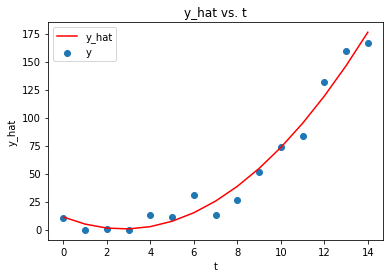

In [38]:
import matplotlib.pyplot as mpl
num_param_best = 3 # number of parameters to be used

theta_hat_true = df.loc[num_param_best, df.columns != 'Loss'] # extraction of row with 3 parameters excluding the "loss" column
y_hat = phi@theta_hat_true # calculation of estimated y_hat vector

mpl.scatter((t - 1), y) # plot measured output y
mpl.plot((t - 1), y_hat, 'r') # plot estimated output y_hat
mpl.xlabel('t')
mpl.ylabel('y_hat')
mpl.title('y_hat vs. t')
mpl.legend(labels=['y_hat', 'y'])

Clearly, when analysing the graph above (y_hat vs. t), one can see that the curve representing the estimated outputs "y_hat" folows the trend of the measured values very closely.

In [42]:
num_param_best = 3
sigma = np.sqrt(2*df['Loss']/(np.array([15]*param_max) - df.index))
pd.DataFrame(sigma, columns=['Sigma'])

,Sigma
1,58.679630
2,26.709885
3,10.281467
4,10.552383
5,10.614049


# Don't foget to talk here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Q.2

In [75]:
import numpy as np
import pandas as pd
from math import cos, sin, pi
import scipy as spy
from numpy.linalg import inv
from scipy.signal import unit_impulse 
import matplotlib.pyplot as mpl

sample_depth = 3000

a1 = 1.3
a2 = 0.75
b0 = 1.1
b1 = -0.35

theta0 = np.array([a1, a2, b0, b1])
p =100*np.identity(4) # starting P matrix

t = [i for i in range(sample_depth)]
u_t1 = unit_impulse(sample_depth, 100) # Creating impulse delta(t - 100)
u_t2 = np.zeros(sample_depth) # Creating unit step unit(t - 100)
u_t2[np.where(np.arange(0,sample_depth) >= 100)] = 1
u_t3 = np.array([sin(2*pi*t[i]/5) + cos(4*pi*t[i]/5) for i in t])

u_t = np.stack([u_t1, u_t2, u_t3]) # impulse = u_t[0], step = u_t[1]

sigma = 0.65
y0 = np.random.normal(0, sigma)
y = [[y0] for i in range(len(u_t))]

theta_hat0 = np.reshape(np.array([0]*4), (-1,1))
theta_hat = [[theta_hat0] for i in range(len(u_t))]

In [76]:
for j in range(len(u_t)):
    p =100*np.identity(4) # starting P matrix
    for i in range(1,sample_depth):
        if (i == 1): # accounts for the lack of t-2 data on first iteration
            phi = np.array([-y[j][i-1], 0, u_t[j][i-1], 0])
        else:
            phi = np.array([-y[j][i-1], -y[j][i-2], u_t[j][i-1], u_t[j][i-2]])
            
        phi = np.asarray(phi).reshape(-1,1) # changes phi's dimensions from (4,) to [4,1] enabling transpose operations
        y[j].append(np.reshape(phi.T@theta0 + np.random.normal(0, sigma), ()))
        # y[j].append(np.reshape(phi.T@theta0 + np.array(noise[i]), ()))
        p = inv(inv(p) + phi*phi.T)
        k = p@phi
        theta_hat[j].append(theta_hat[j][i-1] + k*(y[j][i] - phi.T@theta_hat[j][i-1]))

df_lst = [pd.DataFrame(np.asarray(theta_hat[i]).reshape(-1,4,), 
                   columns=['a1', 'a2', 'b0', 'b1']) for i in range(len(u_t))]

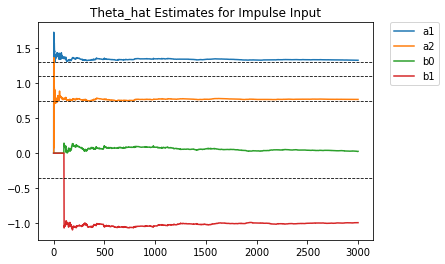

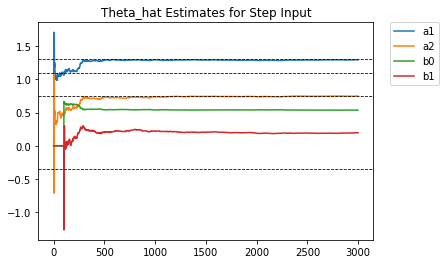

In [77]:
import matplotlib.pyplot as mpl
import seaborn as sns

def theta_hat_ploter(df, title, line_width=0.8):
    graph = sns.lineplot(data=df, dashes=False)

    graph.axhline(y=a1, color='black', linestyle='--', linewidth=line_width, label='a1')
    graph.axhline(y=a2, color='black', linestyle='--', linewidth=line_width, label='a2')
    graph.axhline(y=b0, color='black', linestyle='--', linewidth=line_width, label='b0')
    graph.axhline(y=b1, color='black', linestyle='--', linewidth=line_width, label='b1')

    mpl.title(title)
    mpl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, labels=df_lst[2].columns)
    mpl.show()
    
theta_hat_ploter(df_lst[0], 'Theta_hat Estimates for Impulse Input')
theta_hat_ploter(df_lst[1], 'Theta_hat Estimates for Step Input')

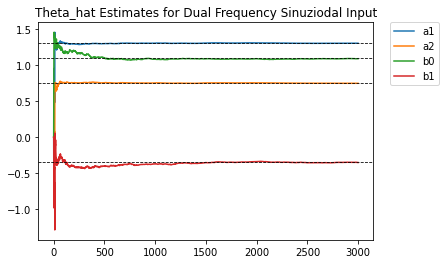

In [78]:
theta_hat_ploter(df_lst[2], 'Theta_hat Estimates for Dual Frequency Sinuziodal Input')